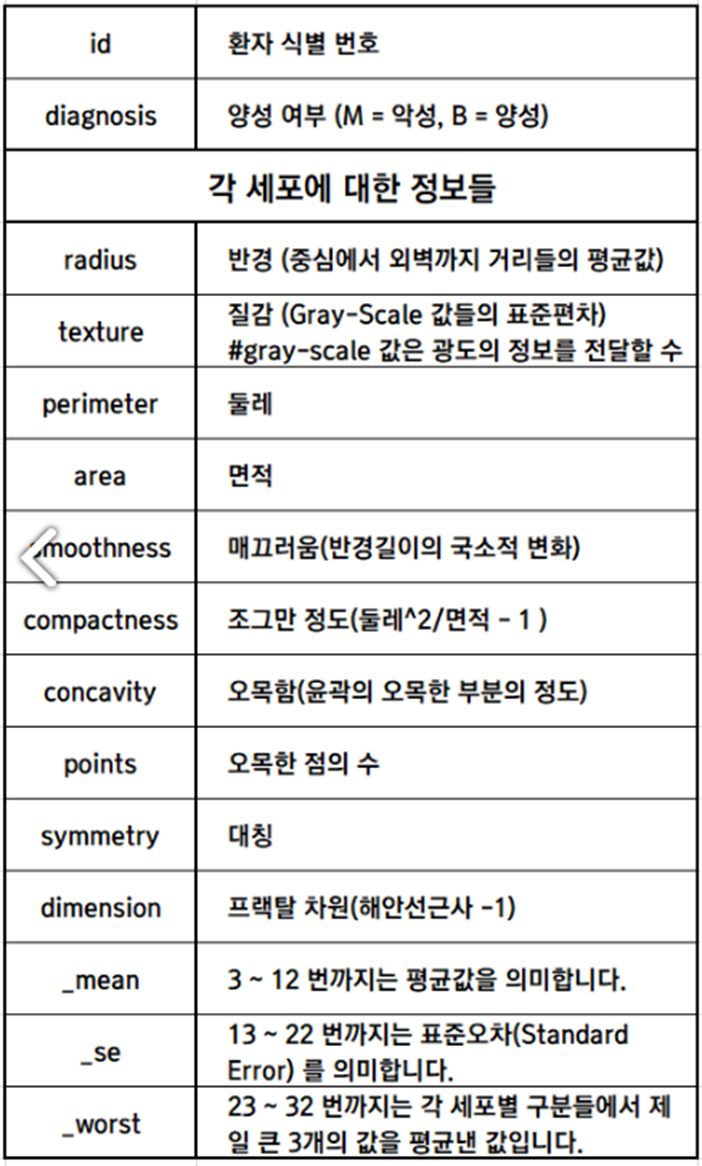

## 4.3 앙상블 학습 개요

### 4.3.1 Voting Classifier

**위스콘신 유방암 데이터 로드**

In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

cancer = load_breast_cancer()
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2)
lgbm_wrapper = LGBMClassifier(n_estimators=400)


In [ ]:
xgb_clf.fit(X_train, y_train)
xgb_preds = xgb_clf.predict(X_test)

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test, xgb_preds)

In [ ]:
xgb_clf1 = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=1)
xgb_clf1.fit(X_train, y_train, eval_metric='auc',
             eval_set=[(X_test, y_test)]) #eval_metric 기본값 rmse(회귀), error(분류)
             # eval_set:성능평가를 수행할 테스트 데이터 세트. 
xgb_preds1 = xgb_clf1.predict(X_test)

In [ ]:
get_clf_eval(y_test, xgb_preds1)

In [ ]:
xgb_clf2 = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=1) # 조기중단 수행
xgb_clf2.fit(X_train, y_train, eval_metric='auc', early_stopping_rounds=200,
             eval_set=[(X_test, y_test)]) #eval_metric 기본값 rmse(회귀), error(분류)
             # eval_set:성능평가를 수행할 테스트 데이터 세트. 
xgb_preds2 = xgb_clf2.predict(X_test) 

In [ ]:
get_clf_eval(y_test, xgb_preds2)

In [ ]:
xgb_clf3 = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=1) # 조기중단 수행
xgb_clf3.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='auc',
             eval_set=[(X_test, y_test)]) #eval_metric 기본값 rmse(회귀), error(분류)
             # eval_set:성능평가를 수행할 테스트 데이터 세트. 
xgb_preds3 = xgb_clf3.predict(X_test) 

In [ ]:
get_clf_eval(y_test, xgb_pred3)

In [ ]:
from xgboost import plot_importance, plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_clf, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_clf1, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_clf2, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_clf3, ax=ax)

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_clf0 = XGBClassifier()
params = {
    'n_estimators':[500, 1000, 2000],
    'learning_rate' : [0.01, 0.05, 0.1],
    'max_depth': [3,4,5,6,7,8,9,10],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
grid_cv = GridSearchCV(xgb_clf0, param_grid=params , cv=5, verbose=1, n_jobs=-1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 평균 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
xgb_pred_grid = grid_cv.best_estimator_.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred_grid)
print('XGB 정확도: {0:.4f}'.format(xgb_accuracy))

In [ ]:
xgb_clf4 = XGBClassifier(n_estimators=2000, learning_rate=0.1, max_depth=3, subsample=0.7, random_state=1) # 조기중단 수행
xgb_clf4.fit(X_train, y_train, early_stopping_rounds=50, eval_metric='auc',
             eval_set=[(X_test, y_test)]) #eval_metric 기본값 rmse(회귀), error(분류)
             # eval_set:성능평가를 수행할 테스트 데이터 세트. 
xgb_preds4 = xgb_clf4.predict(X_test)

In [ ]:
get_clf_eval(y_test, xgb_preds4)

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_clf4, ax=ax)